### Loading data and plotting 

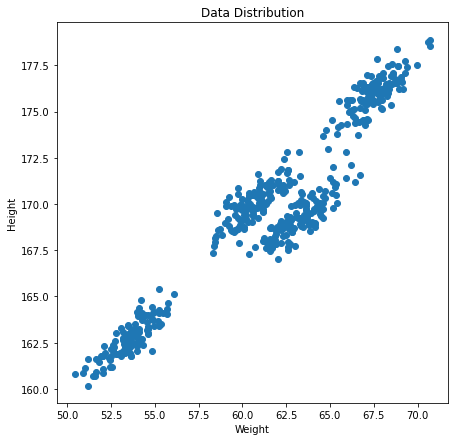

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Clustering_gmm.csv')
plt.figure(figsize=(7,7))
plt.scatter(data["Weight"],data["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

###### As we can see, there are 4 clusters that we would expect our algorithm to pick out

### Building a K-Means Model to test its performance

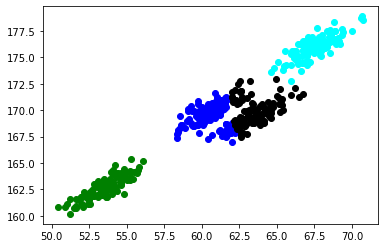

In [2]:
#training k-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
#predictions from kmeans
pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']
#plotting results
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

#### The K-Means model does not do a great job of classifying our 4 clusters and as we can see with the blue and black clusters, there is a bit of mis-assigment at play due to the fact that K-Means is a hard clustering algorithm that performs well with grouping clusters in circular distributions

### Building a GMM model

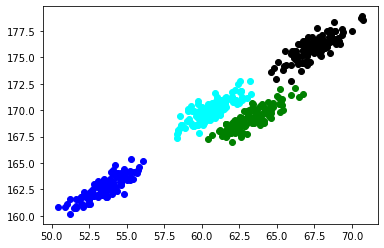

In [3]:
import pandas as pd
data = pd.read_csv('Clustering_gmm.csv')
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)
#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

###### The power of GMM is clearly visible by this illustration. As we can see, our 4 clusters are now perfectly grouped. This is due to the fact that GMM fit clusters of different shape and is a probabilistic model that outputs fuzzy clusters. It is based off a normal distribution and taken into account not just the mean like k-means but also the variance of a distribution. Therefore, in conclusion, a GMM is a far more versatile and robust algorithm when it comes to clustering datapoints of different shapes and sizes.